In [1]:
!python -V

Python 3.10.9


In [2]:
#!pip install seaborn pandas sklearn

In [3]:
import pandas as pd

In [4]:
import pickle

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error

In [68]:
df = pd.read_parquet('./data/green_tripdata_2021-01.parquet')


In [69]:
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2021-01-01 00:15:56,2021-01-01 00:19:52,N,1.0,43,151,1.0,1.01,5.50,0.50,0.5,0.00,0.00,None,0.3,6.80,2.0,1.0,0.00
1,2,2021-01-01 00:25:59,2021-01-01 00:34:44,N,1.0,166,239,1.0,2.53,10.00,0.50,0.5,2.81,0.00,None,0.3,16.86,1.0,1.0,2.75
2,2,2021-01-01 00:45:57,2021-01-01 00:51:55,N,1.0,41,42,1.0,1.12,6.00,0.50,0.5,1.00,0.00,None,0.3,8.30,1.0,1.0,0.00
3,2,2020-12-31 23:57:51,2021-01-01 00:04:56,N,1.0,168,75,1.0,1.99,8.00,0.50,0.5,0.00,0.00,None,0.3,9.30,2.0,1.0,0.00
4,2,2021-01-01 00:16:36,2021-01-01 00:16:40,N,2.0,265,265,3.0,0.00,-52.00,0.00,-0.5,0.00,0.00,None,-0.3,-52.80,3.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76513,2,2021-01-31 21:38:00,2021-01-31 22:16:00,None,NaN,81,90,NaN,17.63,56.23,2.75,0.0,0.00,6.12,None,0.3,65.40,NaN,NaN,NaN
76514,2,2021-01-31 22:43:00,2021-01-31 23:21:00,None,NaN,35,213,NaN,18.36,46.66,0.00,0.0,12.20,6.12,None,0.3,65.28,NaN,NaN,NaN
76515,2,2021-01-31 22:16:00,2021-01-31 22:27:00,None,NaN,74,69,NaN,2.50,18.95,2.75,0.0,0.00,0.00,None,0.3,22.00,NaN,NaN,NaN
76516,2,2021-01-31 23:10:00,2021-01-31 23:37:00,None,NaN,168,215,NaN,14.48,48.87,2.75,0.0,0.00,6.12,None,0.3,58.04,NaN,NaN,NaN


In [70]:
# Transfor str to datetime
df.lpep_dropoff_datetime = pd.to_datetime(df.lpep_dropoff_datetime) 
df.lpep_pickup_datetime = pd.to_datetime(df.lpep_pickup_datetime)

In [ ]:
# SettingWithCopyWarning - View VS Copy
# https://www.dataquest.io/blog/settingwithcopywarning/

In [71]:
df['duration'] = df.lpep_dropoff_datetime - df.lpep_pickup_datetime
#df

In [72]:
df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)
#df

In [73]:
# df = df[df.trip_type == 2 ]
# df

In [74]:
#df.duration.describe(percentiles = [0.95, 0.98, 0.99])
# count    1238.000000
# mean       18.305493
# std       108.364382
# min         0.000000
# 50%         1.666667
# 95%        35.604167
# 98%        59.339333
# 99%       149.837833
# max      1416.100000
# Name: duration, dtype: float64

In [75]:
#((df.duration >= 1) & (df.duration <= 60)).mean()
# 0.5169628432956381


In [76]:
df = df[(df.duration >= 1) & (df.duration <= 60)]


In [77]:
categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']

In [52]:
#td = df.duration.iloc[0]

In [54]:
#td.total_seconds()/60

3.933333333333333

In [78]:
# One-hot - int to object
df[categorical] = df[categorical].astype(str)

/tmp/ipykernel_8402/211123456.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[categorical] = df[categorical].astype(str)


In [79]:
#df[categorical + numerical].iloc[:10].to_dict(orient='records')
# [{'PULocationID': 74, 'DOLocationID': 247, 'trip_distance': 3.64},
#  {'PULocationID': 74, 'DOLocationID': 94, 'trip_distance': 5.82},
#  {'PULocationID': 136, 'DOLocationID': 241, 'trip_distance': 0.57},
#  {'PULocationID': 247, 'DOLocationID': 75, 'trip_distance': 3.43},
#  {'PULocationID': 7, 'DOLocationID': 7, 'trip_distance': 0.65},
#  {'PULocationID': 152, 'DOLocationID': 152, 'trip_distance': 0.1},
#  {'PULocationID': 159, 'DOLocationID': 159, 'trip_distance': 0.27},
#  {'PULocationID': 116, 'DOLocationID': 247, 'trip_distance': 1.21},
#  {'PULocationID': 195, 'DOLocationID': 106, 'trip_distance': 0.49},
#  {'PULocationID': 74, 'DOLocationID': 236, 'trip_distance': 2.12}]

In [80]:
train_dicts = df[categorical + numerical].to_dict(orient='records')

dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)
target = 'duration'
y_train = df[target].values

In [81]:
# LinearRegression model

In [82]:
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [83]:
y_pred = lr.predict(X_train)

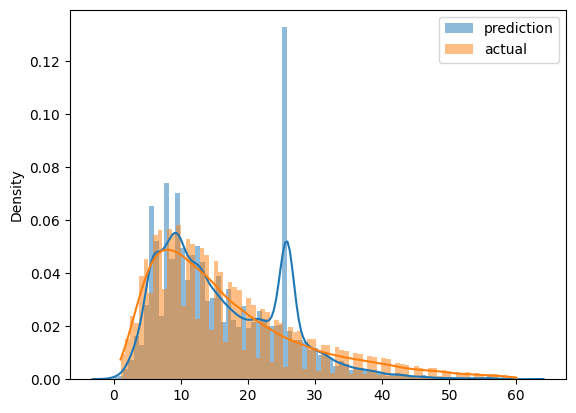

In [18]:
#sns.distplot(y_pred, label='prediction')
sns.histplot(y_pred, label="prediction", kde=True, stat="density", linewidth=0)

#sns.distplot(y_train, label='actual')
sns.histplot(y_train, label="actual", kde=True, stat="density", linewidth=0)


plt.legend()

In [84]:
mean_squared_error(y_train, y_pred, squared=False)

9.838799799886667

In [19]:
def read_dataframe(filename):
    if filename.endswith('.csv'):
        df = pd.read_csv(filename)

        df.lpep_dropoff_datetime = pd.to_datetime(df.lpep_dropoff_datetime)
        df.lpep_pickup_datetime = pd.to_datetime(df.lpep_pickup_datetime)
    elif filename.endswith('.parquet'):
        df = pd.read_parquet(filename)

    df['duration'] = df.lpep_dropoff_datetime - df.lpep_pickup_datetime
    df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

    df = df[(df.duration >= 1) & (df.duration <= 60)]

    categorical = ['PULocationID', 'DOLocationID']
    df[categorical] = df[categorical].astype(str)
    
    return df

In [20]:
df_train = read_dataframe('./data/green_tripdata_2021-01.parquet')
df_val = read_dataframe('./data/green_tripdata_2021-02.parquet')

In [21]:
len(df_train), len(df_val)

(73908, 61921)

In [22]:
df_train['PU_DO'] = df_train['PULocationID'] + '_' + df_train['DOLocationID']
df_val['PU_DO'] = df_val['PULocationID'] + '_' + df_val['DOLocationID']

In [23]:
categorical = ['PU_DO'] #'PULocationID', 'DOLocationID']
numerical = ['trip_distance']

dv = DictVectorizer()

train_dicts = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [24]:
target = 'duration'
y_train = df_train[target].values
y_val = df_val[target].values

In [25]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

mean_squared_error(y_val, y_pred, squared=False)

7.758715199477344

In [26]:
with open('models/lin_reg.bin', 'wb') as f_out:
    pickle.dump((dv, lr), f_out)

FileNotFoundError: [Errno 2] No such file or directory: 'models/lin_reg.bin'

In [ ]:
lr = Lasso(0.01)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

mean_squared_error(y_val, y_pred, squared=False)